In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../../data/ccc_2005_beta.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736 entries, 0 to 4735
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        4736 non-null   object 
 1   Otwarcie    4736 non-null   float64
 2   Najwyzszy   4736 non-null   float64
 3   Najnizszy   4736 non-null   float64
 4   Zamkniecie  4736 non-null   float64
 5   Wolumen     4736 non-null   int64  
 6   Zwrot       4735 non-null   float64
 7   Beta        4646 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 296.1+ KB
None


In [3]:
data['Data'] = pd.to_datetime(data['Data'])
data.dropna(inplace=True)

In [4]:
X = np.arange(len(data)).reshape(-1, 1)
y = data['Beta']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [6]:
model_snn = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_snn.compile(optimizer='adam', loss='mse')

C:\Users\burza\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model_snn.fit(X_train, y_train, epochs=50, verbose=0)

In [8]:
def evaluate_model(model, model_name, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    predictions = model.predict(X_test)
    print(f'{model_name} Test Loss:', test_loss)
    return predictions

predictions_snn = evaluate_model(model_snn, 'Shallow Neural Network', X_test, y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.1101
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Shallow Neural Network Test Loss: 0.15748798847198486


In [9]:
predictions_snn = model_snn.predict(X_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


In [10]:
test_dates = data['Data'].iloc[X_test.flatten()]

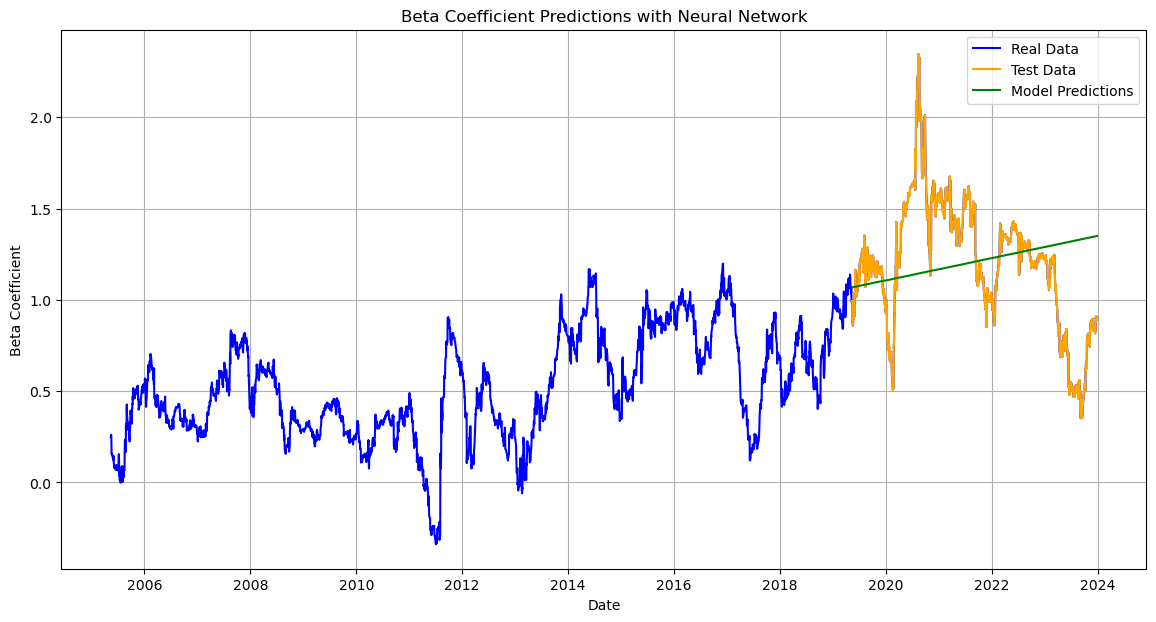

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Data'], y, label='Real Data', color='blue', linewidth=1.5)
plt.plot(test_dates, y_test, label='Test Data', color='orange', linewidth=1.5)
plt.plot(test_dates, predictions_snn.flatten(), label='Model Predictions', color='green', linewidth=1.5)
plt.title('Beta Coefficient Predictions with Neural Network')
plt.xlabel('Date')
plt.ylabel('Beta Coefficient')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions_snn.flatten())
rmse = mean_squared_error(y_test, predictions_snn.flatten(), squared = False)

print("Mean Absolute Error (MAE):", mae)
print("Squared Mean Absolute Error (RMSE)", rmse)

Mean Absolute Error (MAE): 0.3002050265809855
Squared Mean Absolute Error (RMSE) 0.3951850405313247
